##Data Analysis for Short-Term Solar Energy Production Forecasting

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uncomment if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load training and test dataset
train_data = "/content/drive/MyDrive/AI_Sustainability/data/train_data_ensemble_0-agg.csv"
X = pd.read_csv(train_data)
print(X.head())
train_dataset = X[['Date', 'min_dist_node', 'stid', 'tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0',
            'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0',
            'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0', 'pres_msl_0', 'Daily_Production']]

test_data = "/content/drive/MyDrive/AI_Sustainability/data/test_data_ensemble_0-agg.csv"
X = pd.read_csv(test_data)
test_dataset = X[['Date', 'min_dist_node','stid', 'tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0',
            'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0',
            'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0', 'pres_msl_0', 'Daily_Production']]

stations = train_dataset['stid'].unique()
print(f"Number of stations: {len(stations)}")

         Date  stid  Daily_Production  \
0  2000-01-01  ACME          11860500   
1  2000-01-02  ACME          11065500   
2  2000-01-03  ACME          11982900   
3  2000-01-04  ACME          13254000   
4  2000-01-05  ACME          12955200   

                                       new_distances  \
0  {(np.float32(33.0), np.float32(257.0)): 501.30...   
1  {(np.float32(33.0), np.float32(257.0)): 501.30...   
2  {(np.float32(33.0), np.float32(257.0)): 501.30...   
3  {(np.float32(33.0), np.float32(257.0)): 501.30...   
4  {(np.float32(33.0), np.float32(257.0)): 501.30...   

                           min_dist_node  \
0  (np.float32(35.0), np.float32(262.0))   
1  (np.float32(35.0), np.float32(262.0))   
2  (np.float32(35.0), np.float32(262.0))   
3  (np.float32(35.0), np.float32(262.0))   
4  (np.float32(35.0), np.float32(262.0))   

                                            join  tcolc_eatm_0  ulwrf_tatm_0  \
0  20000101(np.float32(35.0), np.float32(262.0))      0.001185     257.

##Mulicollinearity Analysis

In [5]:
def multicollinearity_analysis(df, features, figsize=(14,10)):
    import numpy as np

    clean_features = []

    for feature in features:
        series = df[feature]
        if pd.api.types.is_numeric_dtype(series):
            clean_features.append(feature)
        else:
            try:
                df[feature] = pd.to_numeric(series, errors='raise')
                clean_features.append(feature)
            except (ValueError, TypeError):
                print(f"Dropping column '{feature}' due to non-numeric values or incompatible format.")

    # Drop NA rows just for VIF/correlation
    df_clean = df[clean_features].dropna()

    # Compute and plot correlation heatmap
    corr_matrix = df_clean.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Feature Correlation Heatmap (Multicollinearity)")
    plt.tight_layout()
    plt.show()

    # Calculate VIF
    from sklearn.preprocessing import StandardScaler
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = clean_features
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    print("\nVariance Inflation Factors (VIF):")
    print(vif_data.sort_values('VIF', ascending=False))


Dropping column 'min_dist_node' due to non-numeric values or incompatible format.
Dropping column 'ulwrf_tatm_0' due to non-numeric values or incompatible format.
Dropping column 'dlwrf_sfc_0' due to non-numeric values or incompatible format.
Dropping column 'tmp_sfc_0' due to non-numeric values or incompatible format.
Dropping column 'ulwrf_tatm_0' due to non-numeric values or incompatible format.
Dropping column 'dlwrf_sfc_0' due to non-numeric values or incompatible format.
Dropping column 'tmp_sfc_0' due to non-numeric values or incompatible format.


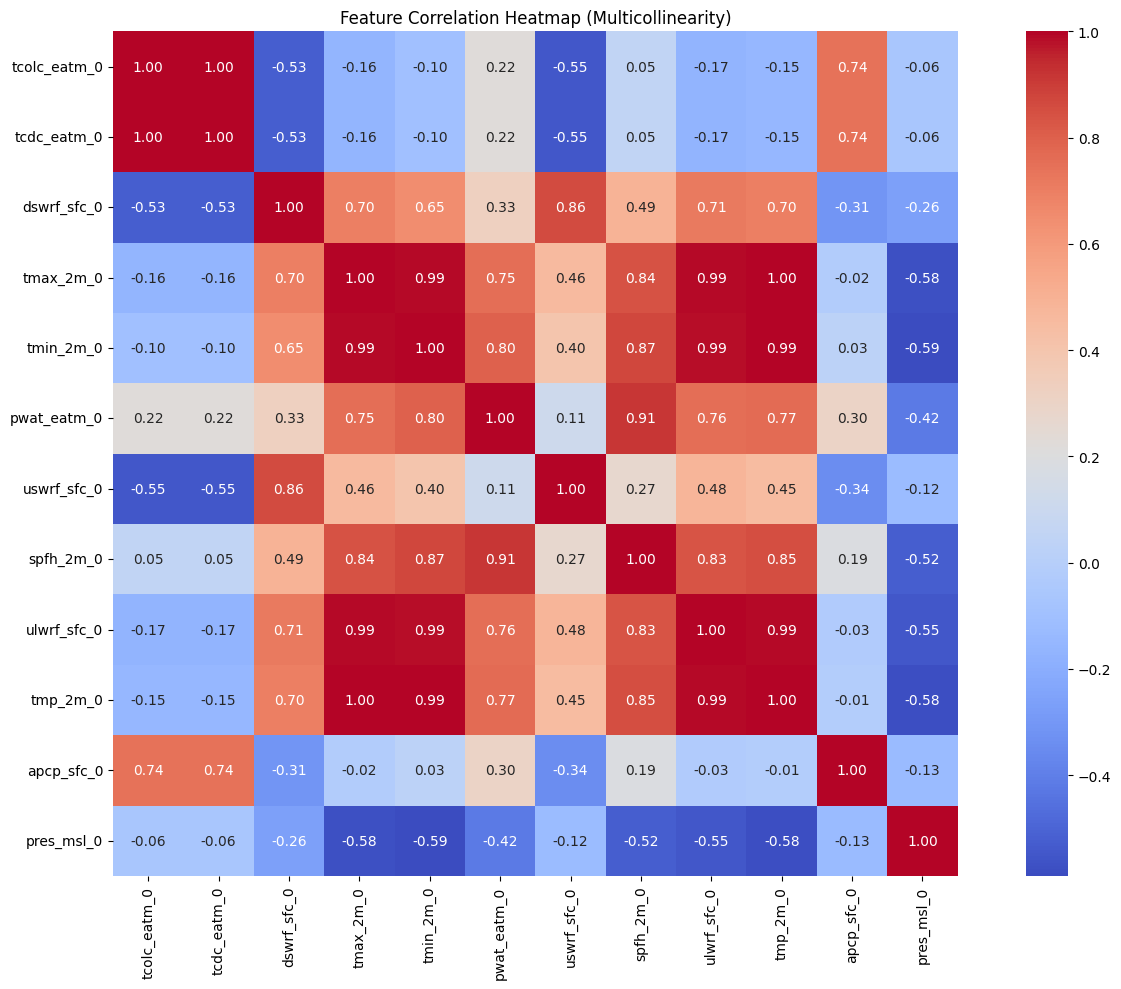


Variance Inflation Factors (VIF):
         Feature           VIF
1    tcdc_eatm_0  80109.559615
0   tcolc_eatm_0  80059.852394
9       tmp_2m_0    609.052263
3      tmax_2m_0    486.486343
4      tmin_2m_0    192.528353
8    ulwrf_sfc_0     92.768626
7      spfh_2m_0     11.674135
5    pwat_eatm_0      9.549610
2    dswrf_sfc_0      9.309604
6    uswrf_sfc_0      4.990188
10    apcp_sfc_0      2.447787
11    pres_msl_0      1.814364


In [6]:
# List of features excluding target and non-numeric ones
feature_cols = [col for col in train_dataset.columns if col not in ['Date', 'stid', 'Daily_Production']]

# Run analysis
multicollinearity_analysis(train_dataset, feature_cols)

##Correlation Analysis with Solar Energy Production

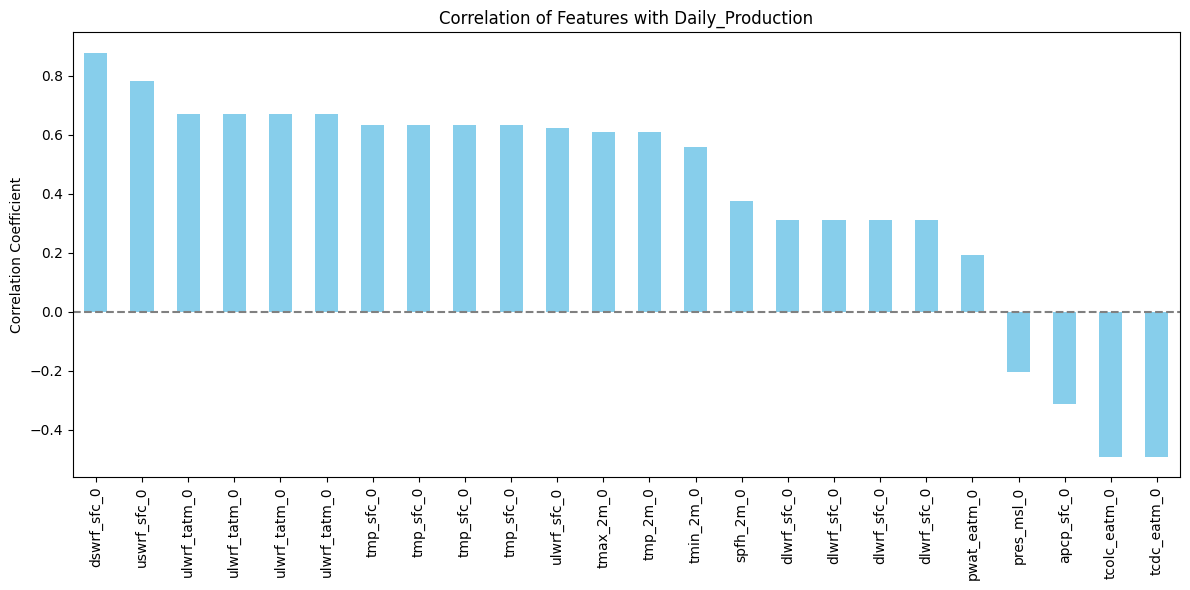

,Daily_Production
dswrf_sfc_0,0.879220
uswrf_sfc_0,0.782502
ulwrf_tatm_0,0.672299
ulwrf_tatm_0,0.672299
ulwrf_tatm_0,0.672299
ulwrf_tatm_0,0.672299
tmp_sfc_0,0.633112
tmp_sfc_0,0.633112
tmp_sfc_0,0.633112
tmp_sfc_0,0.633112


In [7]:
def correlation_with_target(df, target='Daily_Production', figsize=(12,6)):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    numeric_cols.remove(target)

    corrs = df[numeric_cols + [target]].corr()[target].drop(target).sort_values(ascending=False)

    plt.figure(figsize=figsize)
    corrs.plot(kind='bar', color='skyblue')
    plt.ylabel('Correlation Coefficient')
    plt.title(f'Correlation of Features with {target}')
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    return corrs

# Visualize correlations with the target
correlation_with_target(train_dataset)